In [1]:
from imports import *
from ChannelShape import *

Welcome to JupyROOT 6.28/10


In [2]:
# Confirm that name/type lookups work after first call
print(DetectorShape._dtypes)                # Should print "None"
print(DetectorShape.getDetType("iZIP5"))    # Should print "11"
print(DetectorShape._dtypes)                # Should now print dictionary
print(DetectorShape.getDetName(710))        # Should print "HV100mm"

None
11
{'oZIP': 4, 'iZIP1': 10, 'iZIP2': 12, 'iZIP5': 11, 'CDMSlite1': 21, 'CDMSlite2': 22, 'iZIP7': 700, 'iZIP7Si': 701, 'HV100mm': 710, 'HV100mmSi': 711}
HV100mm


In [3]:
# Files containing detector geometries
iZIP5="data/GeometryOnly/iZIP5_elog1425.root"
iZIP7="data/GeometryOnly/iZIP7_elog1425.root"
HV100mm="data/GeometryOnly/HV100mm_elog1425.root"

In [4]:
# Load a geometry file
Det_iZIP7=DetectorShape().Load(iZIP7)
Det_iZIP7

{'Qo1': <ChannelShape('Qo1',2,43.26,48.3,-3.141592653589793,3.141592653589793,1.0)>,
 'Qi1': <ChannelShape('Qi1',2,0.0,43.26,-3.141592653589793,3.141592653589793,1.0)>,
 'Qo2': <ChannelShape('Qo2',2,43.26,48.3,-3.141592653589793,3.141592653589793,-1.0)>,
 'Qi2': <ChannelShape('Qi2',2,0.0,43.26,-3.141592653589793,3.141592653589793,-1.0)>,
 'PBS1': <ChannelShape('PBS1',1,19.262,44.818,1.5707963267948966,3.141592653589793,1.0)>,
 'PAS1': <ChannelShape('PAS1',1,44.818,48.3,-3.141592653589793,3.141592653589793,1.0)>,
 'PCS1': <ChannelShape('PCS1',1,19.262,44.818,-3.141592653589793,-1.5707963267948966,1.0)>,
 'PFS1': <ChannelShape('PFS1',1,0.0,19.262,-3.141592653589793,3.141592653589793,1.0)>,
 'PDS1': <ChannelShape('PDS1',1,19.262,44.818,-1.5707963267948966,0.0,1.0)>,
 'PES1': <ChannelShape('PES1',1,19.262,44.818,0.0,1.5707963267948966,1.0)>,
 'PBS2': <ChannelShape('PBS2',1,19.262,44.818,0.7853981633974483,2.356194490192345,-1.0)>,
 'PFS2': <ChannelShape('PFS2',1,0.0,19.262,-3.1415926535897

In [5]:
print(Det_iZIP7["PCS1"])
print(Det_iZIP7["Qo2"])
print(Det_iZIP7["Det"])

Channel PCS1 (TES): r[19.262..44.818 mm] phi[-180.0..-90.0 deg] +z
  2 flats: Flat @ phi 90.0 [79.94776220335044..100.05223779664956] deg, r 44.13 mm
           Flat @ phi -90.0 [-100.05223779664956..-79.94776220335044] deg, r 44.13 mm
Channel Qo2 (FET): r[43.26..48.3 mm] phi[-180.0..180.0 deg] -z
Channel Det (NA): r[0.0..50.0 mm] phi[-180.0..180.0 deg] +z
  2 flats: Flat @ phi 90.0 [79.64087389415656..100.35912610584344] deg, r 49.185 mm
           Flat @ phi -90.0 [-100.35912610584344..-79.64087389415656] deg, r 49.185 mm


In [6]:
print(Det_iZIP7.TES)

{'PBS1': <ChannelShape('PBS1',1,19.262,44.818,1.5707963267948966,3.141592653589793,1.0)>, 'PAS1': <ChannelShape('PAS1',1,44.818,48.3,-3.141592653589793,3.141592653589793,1.0)>, 'PCS1': <ChannelShape('PCS1',1,19.262,44.818,-3.141592653589793,-1.5707963267948966,1.0)>, 'PFS1': <ChannelShape('PFS1',1,0.0,19.262,-3.141592653589793,3.141592653589793,1.0)>, 'PDS1': <ChannelShape('PDS1',1,19.262,44.818,-1.5707963267948966,0.0,1.0)>, 'PES1': <ChannelShape('PES1',1,19.262,44.818,0.0,1.5707963267948966,1.0)>, 'PBS2': <ChannelShape('PBS2',1,19.262,44.818,0.7853981633974483,2.356194490192345,-1.0)>, 'PFS2': <ChannelShape('PFS2',1,0.0,19.262,-3.141592653589793,3.141592653589793,-1.0)>, 'PES2': <ChannelShape('PES2',1,19.262,44.818,2.356194490192345,-2.356194490192345,-1.0)>, 'PAS2': <ChannelShape('PAS2',1,44.818,48.3,-3.141592653589793,3.141592653589793,-1.0)>, 'PDS2': <ChannelShape('PDS2',1,19.262,44.818,-2.356194490192345,-0.7853981633974483,-1.0)>, 'PCS2': <ChannelShape('PCS2',1,19.262,44.818,-0.

In [7]:
print(Det_iZIP7.contains((0,-15,1)))        # Reports True
print(Det_iZIP7.contains((45,20,-12)))      # Reports False

True
False


In [8]:
# Reports channel where point is located
# FIXME: Reports charge channels because they come first in dictionary
# TODO: Have it return a list of all the matches (excluding "Det")
print(Det_iZIP7.findChannel((0,-15,1)))
print(Det_iZIP7.findChannel((0,-15,-1)))

['Qi1', 'PFS1']
['Qi2', 'PFS2']


In [15]:
# NOTE: Boundaries between channels on top are at 0, +/-pi/2, pi
print(Det_iZIP7.TES.findChannel((0,-25,1)))     # Matches two channels!
print(Det_iZIP7.FET.findChannel((0,-25,-1)))

['PCS1', 'PDS1']
Qi2


In [10]:
# Get (x,y) point on sidewall closest to specified position
print(Det_iZIP7.getPointOnEdge((30,30)))    # Inside detector, reports (35.355,35.355)
print(Det_iZIP7.getPointOnEdge((-70,70)))   # Outside detector, reports (-35.355,35.355)
print(Det_iZIP7.getPointOnEdge((0,45)))     # Inside detector, near top flat (0,49.185)

(35.35533905932738, 35.35533905932737)
(-35.35533905932737, 35.35533905932738)
(3.0117126408031283e-15, 49.185)


In [11]:
# Get unit normal vector at specified sidewall point
edge = Det_iZIP7.getPointOnEdge((30,30))    # Point at phi = 45 degrees
print(Det_iZIP7.getOutwardNormal(edge))     # Should be (0.7071,0.7071)

(0.7071067811865476, 0.7071067811865475)


In [19]:
# Let's see if I can draw the detector outline
phi = np.arange(1000)*2.*pi/1000.
rdet = [ChannelShape.cart2pol(Det_iZIP7.getPointAtPhi(f))[0] for f in phi]
edge = [Det_iZIP7.getPointAtPhi(f) for f in phi]    # Cartesian points

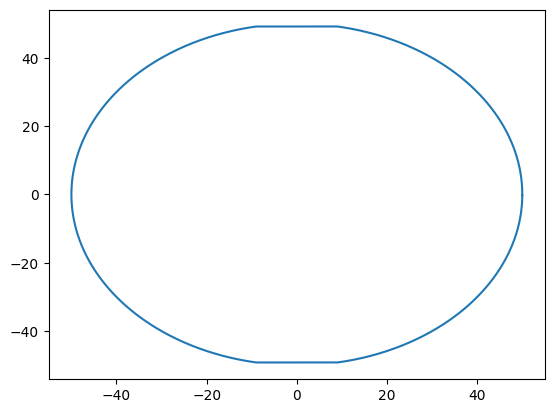

In [18]:
plt.plot(*zip(*edge))